# Hacettepe University
### BBM 409 1st ASSIGNMENT


#### Name and Surname: Fatih Pehlivan – Göktuğ Ocaklıoğlu
#### Identity Number: 21946529 - 2200356841
#### Course:  BBM 409

#### Due Date: 01.11.2022
#### Advisor: Burçak Asal
#### Python Version: 3.10.4
#### NumPy Version: 1.23.4
#### Pandas Version: 1.4.2

Import the libraries

In [1]:
import sys
# Import libraries
import copy

import numpy as np
import pandas as pd

#### KNN Algorithm Part

Define a class of data set Attributes

In [2]:
class Attribute:
    def __init__(self, name, distance):
        self.name = name
        self.distance = distance

    def __lt__(self, other):
        return self.distance < other.distance

    def getName(self):
        return self.name

    def getDistance(self):
        return self.distance

    def getWeight(self):
        return 1 / self.distance

    def __str__(self):
        return str(self.name) + " " + str(self.distance)

Find max function takes numpy array with length = k value. It determines maximum distance, and it is index. In algorithm change the array element according to these values. If there is equal max values the function determines the first maximum element.

Actually we thought about max heap to decrease the run-time but the numpy array length is maximum 9. So that we used numpy array.

In [3]:
def find_max(numpy_arr):
    """
    find_max function find the maximum value, and it is index
    :param numpy_arr: contains Attribute objects
    :return: maximum distance, and it is index
    """

    max = numpy_arr[0]
    count = 0
    index = 0
    for i in numpy_arr:
        if i.getDistance() > max.getDistance():
            max = i
            index = count
        count += 1
    return max, index

Determine most weighted or most frequent element in the numpy array. If there is equal frequent or weighted the function returns first most weighted or frequent Attribute. Therefore, this may reduce the prediction truth

In [4]:
def most_frequent(numpy_arr, weighted):
    """
    find the maximum weight of given array's attributes
    :param numpy_arr: contains Attribute objects
    :param weighted: is a boolean value. Determine the calculation is weighted or not
    :return: maximum weight of Attribute object
    """

    dict = {}
    for i in numpy_arr:
        if dict.get(i.getName()) is None:
            if weighted:
                dict[i.getName()] = i.getWeight()
            else:
                dict[i.getName()] = 1
        else:
            if weighted:
                dict[i.getName()] = dict.get(i.getName()) + i.getWeight()
            else:
                dict[i.getName()] = dict.get(i.getName()) + 1
    return max(dict, key=dict.get)

This function for part 2, if the algorithm weighted it calculates (Σ (1/weight) / Σ (weight * value)) if not, takes the average of values.

In [5]:
def most_frequentP2(numpy_arr, weighted):
    """
    find average or weighted average of the array
    :param numpy_arr: contains Attribute objects
    :param weighted: is a boolean value. Determine the calculation is weighted or not
    :return: average or weighted average of the array
    """

    if weighted:
        numerator = 0
        denominator = 0
        for i in numpy_arr:
            numerator += (i.getName() * i.getWeight())
            denominator += i.getWeight()
        if denominator == 0:
            denominator = 0.00001
        return numerator / denominator
    else:
        sum = 0
        for i in numpy_arr:
            sum += i.getName()
        return sum / len(numpy_arr)

This knn_algorithm is for part1.
When calculate k = 9 it is easy to calculate k = 7. I sorted the Attribute array according to distances the romeve last 2 elements to calculate k = 7 and so on.
When calculate k = 9, it is easy to calculate their weighted and unweighted situations and so on.

I used euclidean distance for this assignment.

In [6]:
def knn_algorithm(X_train, y_train, X_test):
    """
    knn_algorithm function calculate 9, 7, 5, 3, 1 nearest neighbor for weighted and unweighted according to given params
    :param X_train: is a numpy array, this is train attribute values
    :param y_train: is a numpy array, this is train results
    :param X_test: is a numpy array, this is test attribute values
    :return: a numpy_array list, for k = 9, 7, 5, 3 ,1 respectively, unweighted and weighted respectively.
    """
    # initialize the min numbers array for the maximum value by using sys.maxsize
    min_numbers = np.full((9), Attribute("", sys.maxsize), dtype=Attribute)
    returnArray = np.zeros((10, len(X_test)), dtype='<U6')
    arrayCounter = 0
    for i in X_test:
        for k in range(9):
            min_numbers[k] = Attribute("", sys.maxsize)
        max_num = min_numbers[0]
        index = 0
        count = 0
        for j in X_train:
            # calculete the distance
            arr = np.subtract(i, j)
            arr = np.power(arr, 2)
            sum = np.sum(arr) ** 0.5
            if sum < max_num.getDistance():
                min_numbers[index] = Attribute(y_train[count], sum)
            max_num, index = find_max(min_numbers)
            count += 1
        np.sort(min_numbers)
        returnArray[0][arrayCounter] = most_frequent(min_numbers, False)
        returnArray[1][arrayCounter] = most_frequent(min_numbers[: -2], False)
        returnArray[2][arrayCounter] = most_frequent(min_numbers[: -4], False)
        returnArray[3][arrayCounter] = most_frequent(min_numbers[: -6], False)
        returnArray[4][arrayCounter] = most_frequent(min_numbers[: -8], False)
        returnArray[5][arrayCounter] = most_frequent(min_numbers, True)
        returnArray[6][arrayCounter] = most_frequent(min_numbers[: -2], True)
        returnArray[7][arrayCounter] = most_frequent(min_numbers[: -4], True)
        returnArray[8][arrayCounter] = most_frequent(min_numbers[: -6], True)
        returnArray[9][arrayCounter] = most_frequent(min_numbers[: -8], True)

        arrayCounter += 1

    return returnArray


This knn function for part2. It is similar to part1's function.
Only difference is returns 2 arrays for heating and cooling and the other difference is calculating the estimation. (puts the arrays average or weighted average)

In [7]:
def knn_algorithmP2(X_train, y_train_heating, y_traing_cooling, X_test):
    """
    knn_algorithm function calculate 9, 7, 5, 3, 1 nearest neighbor for weighted and unweighted according to given params
    :param X_train: is a numpy array, this is train attribute values
    :param y_train: is a numpy array, this is train results
    :param X_test: is a numpy array, this is test attribute values
    :return: 2 numpy_array lists, for k = 9, 7, 5, 3 ,1 respectively, unweighted and weighted respectively.
    """
    # initialize the min numbers array for the maximum value by using sys.maxsize
    min_numbers_heating = np.full((9), Attribute(0, sys.maxsize), dtype=Attribute)
    min_numbers_cooling = np.full((9), Attribute(0, sys.maxsize), dtype=Attribute)
    returnArrayHeating = np.zeros((10, len(X_test)), dtype=float)
    returnArrayCooling = np.zeros((10, len(X_test)), dtype=float)
    arrayCounter = 0
    for i in X_test:
        for k in range(9):
            min_numbers_heating[k] = Attribute(0, sys.maxsize)
            min_numbers_cooling[k] = Attribute(0, sys.maxsize)
        max_num_heating = min_numbers_heating[0]
        index_heating = 0
        max_num_cooling = min_numbers_cooling[0]
        index_cooling = 0
        count = 0
        for j in X_train:
            # calculete the distance
            arr = np.subtract(i, j)
            arr = np.power(arr, 2)
            sum = np.sum(arr) ** 0.5
            if sum < max_num_heating.getDistance():
                min_numbers_heating[index_heating] = Attribute(y_train_heating[count], sum)
            max_num_heating, index_heating = find_max(min_numbers_heating)
            if sum < max_num_cooling.getDistance():
                min_numbers_cooling[index_cooling] = Attribute(y_traing_cooling[count], sum)
            max_num_cooling, index_cooling = find_max(min_numbers_cooling)
            count += 1

        np.sort(min_numbers_heating)
        np.sort(min_numbers_cooling)
        returnArrayHeating[0][arrayCounter] = most_frequentP2(min_numbers_heating, False)
        returnArrayHeating[1][arrayCounter] = most_frequentP2(min_numbers_heating[: -2], False)
        returnArrayHeating[2][arrayCounter] = most_frequentP2(min_numbers_heating[: -4], False)
        returnArrayHeating[3][arrayCounter] = most_frequentP2(min_numbers_heating[: -6], False)
        returnArrayHeating[4][arrayCounter] = most_frequentP2(min_numbers_heating[: -8], False)
        returnArrayHeating[5][arrayCounter] = most_frequentP2(min_numbers_heating, True)
        returnArrayHeating[6][arrayCounter] = most_frequentP2(min_numbers_heating[: -2], True)
        returnArrayHeating[7][arrayCounter] = most_frequentP2(min_numbers_heating[: -4], True)
        returnArrayHeating[8][arrayCounter] = most_frequentP2(min_numbers_heating[: -6], True)
        returnArrayHeating[9][arrayCounter] = most_frequentP2(min_numbers_heating[: -8], True)

        returnArrayCooling[0][arrayCounter] = most_frequentP2(min_numbers_cooling, False)
        returnArrayCooling[1][arrayCounter] = most_frequentP2(min_numbers_cooling[: -2], False)
        returnArrayCooling[2][arrayCounter] = most_frequentP2(min_numbers_cooling[: -4], False)
        returnArrayCooling[3][arrayCounter] = most_frequentP2(min_numbers_cooling[: -6], False)
        returnArrayCooling[4][arrayCounter] = most_frequentP2(min_numbers_cooling[: -8], False)
        returnArrayCooling[5][arrayCounter] = most_frequentP2(min_numbers_cooling, True)
        returnArrayCooling[6][arrayCounter] = most_frequentP2(min_numbers_cooling[: -2], True)
        returnArrayCooling[7][arrayCounter] = most_frequentP2(min_numbers_cooling[: -4], True)
        returnArrayCooling[8][arrayCounter] = most_frequentP2(min_numbers_cooling[: -6], True)
        returnArrayCooling[9][arrayCounter] = most_frequentP2(min_numbers_cooling[: -8], True)

        arrayCounter += 1
    return returnArrayHeating, returnArrayCooling

#### Read the CSV file

We used numpy array for reading the data. Then we remove thefirst row of the dataset because it is unnecessary for calculation.

In [8]:
def read_csv(filename):

    """
    read the file and make it numpy array
    :param filename: is string of file path
    :return: numpy array
    """

    arr = np.loadtxt(filename, delimiter=",", dtype=str,  quotechar='"', )[1::, ::]
    return arr


#### Shuffle and split the data to data and results

This shuffle function for part 1. We used sets for shuffling the data. Because sets generate random order for "string" indexes. However, the function cannot shuffle a data multiple times. If you want to shuffle data to take another order you have to restart the program.
I convert the data types attributes to float-64

In [9]:
def shuffle(data):

    """
    shuffles the given data
    :param data: is a numpy array
    :return: shuffled data indexes, shuffled data attributes and shuffled data results
    """

    shuffled_data = np.zeros((10000, 62), dtype='<U116')

    mySet = set({})
    for i in range(len(data)):
        mySet.add(str(i))
    count = 0

    for i in mySet:
        shuffled_data[count] = np.copy(data[int(i)])
        count += 1

    return shuffled_data[:, 0], shuffled_data[:, 1:-1].astype('float64'), shuffled_data[:, -1]

This shuffle function for part 2. It is same as the for part 1.
Only difference is split the data 3 parts. Attributes data, heating data and cooling data and convert the all data to float-64.

In [10]:
def shuffleP2 (data):
    """
    shuffles the given data
    :param data:
    :return attribute data, heating result data, cooling result data:
    """
    shuffled_data = np.zeros((768, 10), dtype=float)

    sum = set({})
    for i in range(len(data)):
        sum.add(str(i))
    count = 0
    for i in sum:
        shuffled_data[count] = np.copy(data[int(i)])
        count += 1
    return shuffled_data[:, :-2].astype('float64'), shuffled_data[:, -2].astype('float64'), shuffled_data[:, -1].astype('float64')


#### Function.py File

Funtion.py includes functions that normalization and calculate performance metric (accuracy, precision, recall) for Part1

In [11]:
def findPerformanceMetric(prediction_array, original_array):
    """"
    findPerformanceMetric function calculate accuracy, precision and recall of your prediction array
    :param prediction_array: is a array, this is prediction value
    :param original_array: is a array, this is truth value
    :return: accuracy, average of precision  and average of recall
    """
    personality_list=np.unique(original_array)
    size = np.size(personality_list)
    cross_table = pd.DataFrame(data=np.zeros((size, size)), index=personality_list,
                               columns=personality_list,dtype=int)
    for i in range(np.size(prediction_array)):
        cross_table[original_array[i]][prediction_array[i]] +=1
    X = cross_table.values
    accuracy = round((np.sum(X.diagonal()) / np.sum(X)),3)
    precision = np.round((X.diagonal() / np.sum(X,axis=1)),decimals=3)
    recall = np.round((X.diagonal() / np.sum(X,axis=0)),decimals=3)
    cross_table['Precision'] = precision
    cross_table['Recall'] = recall
    cross_table['Accuracy'] = accuracy
    mean_precision = round(precision.mean(),3)
    mean_recall = round(recall.mean(),3)
    return accuracy, mean_precision, mean_recall, cross_table

For example for cross_table:
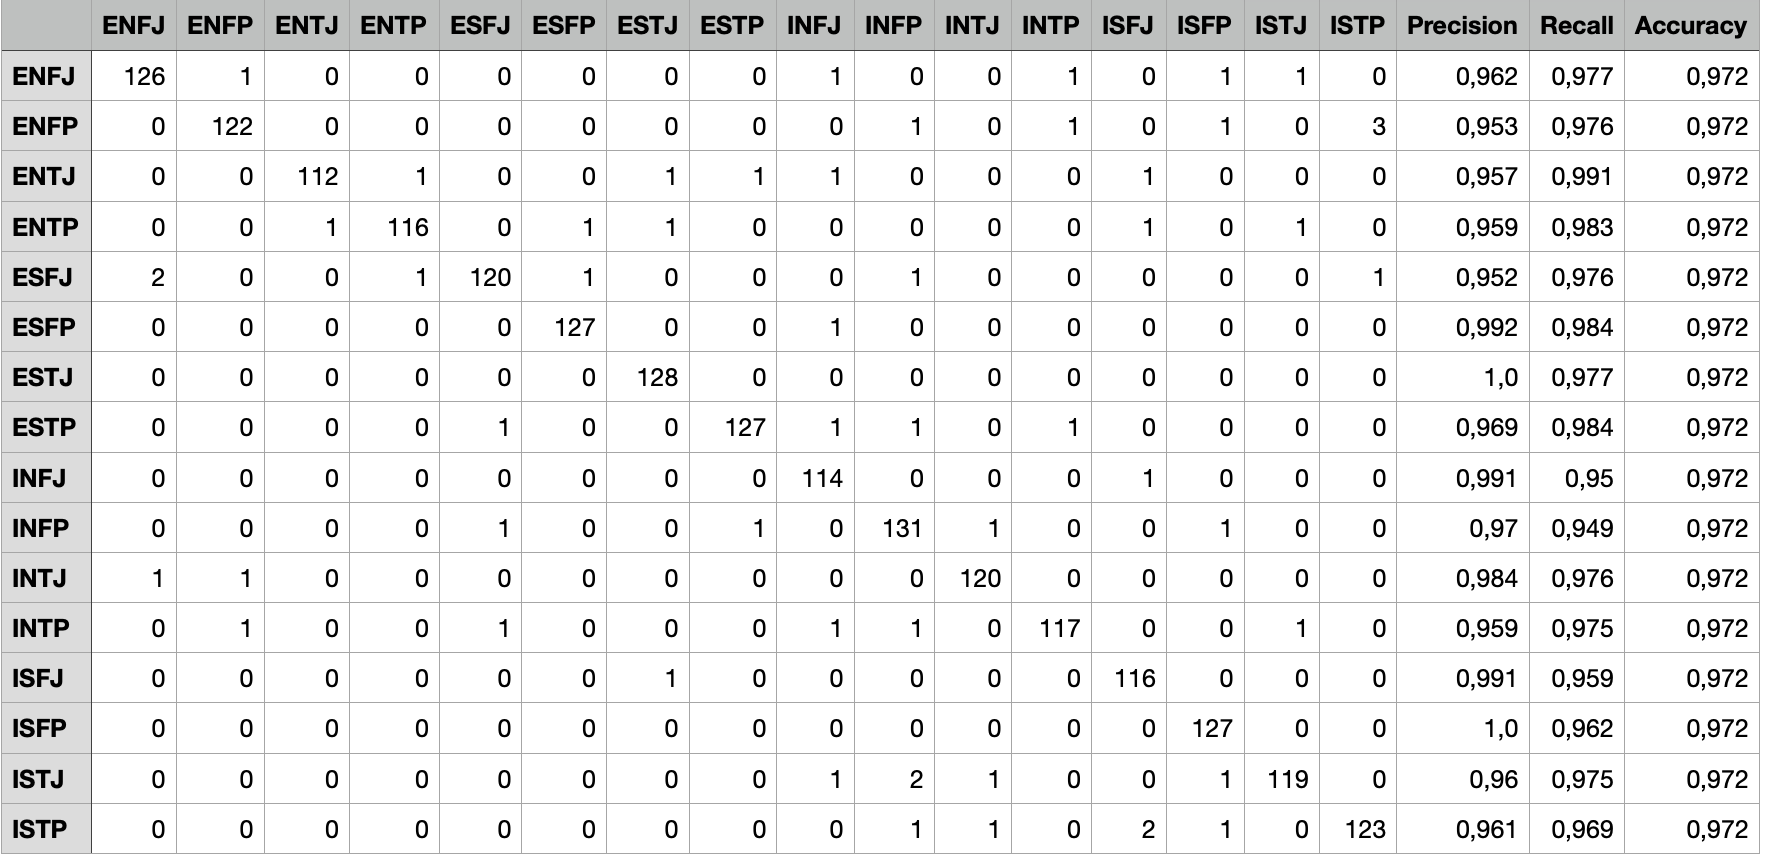

In [12]:
def normalization(feature_array):
    """
    normalization function rescale each feature between (0-1) range
    :param feature_array:
    :return: normalization of feature array
    """
    feature_array = np.array(feature_array)
    coulumn_min=feature_array.min(axis=0)
    coulumn_max=feature_array.max(axis=0)
    feature_array=(feature_array-coulumn_min)/(coulumn_max-coulumn_min)
    return feature_array

# PART 1: Personality Classification

In this part of the assignment, we will implement a nearest neighbor algorithm to classify different personality types of people by using 5-fold cross-validaton method. 

In [13]:
data=read_csv("subset_16P.csv")

In [14]:
data

array([['35874', '-1', '0', ..., '-1', '0', 'ENTP'],
       ['42624', '0', '0', ..., '-3', '2', 'INTP'],
       ['55199', '0', '0', ..., '0', '0', 'ESTP'],
       ...,
       ['46766', '0', '0', ..., '0', '1', 'ENFP'],
       ['2050', '0', '0', ..., '0', '1', 'INFJ'],
       ['17328', '-1', '1', ..., '1', '1', 'ESTP']], dtype='<U116')

We used python sets for shuffling. When add indexes as a string python sets generate unordered order. So that we can shuffle the data by using python sets.

In [15]:
# Shuffle
shuffled_indexes, shuffled_data, shuffled_result_data = shuffle(data)

length_of_data = len(shuffled_data)

In [16]:
#Result tables
accuracy_table=pd.DataFrame(columns=["noUnweighted1","noUnweighted3","noUnweighted5","noUnweighted7","noUnweighted9"
                                     ,"noWeighted1","noWeighted3","noWeighted5","noWeighted7","noWeighted9"
                                     ,"NormalUnweighted1","NormalUnweighted3","NormalUnweighted5","NormalUnweighted7","NormalUnweighted9"
                                     ,"NormalWeighted1","NormalWeighted3","NormalWeighted5","NormalWeighted7","NormalWeighted9"],
                            index=["Fold1","Fold2", "Fold3", "Fold4","Fold5"])

recall_table=copy.deepcopy(accuracy_table)
precision_table=copy.deepcopy(accuracy_table)

Calculation of weighted and unweighted estimates for non-normalized values for fold1 fold2 fold3 fold4 and fold5

#### non-Normalized Part

In [17]:
sample_error = ""
sample_expected = ""
sample_test = np.array((60), dtype='<U116')
for i in range(5):
    # define start and end indexes for 5 fold
    start_index = int(length_of_data * 0.2 * i)
    end_index = int(length_of_data * 0.2 * (i + 1))

    # define train and test values
    X_train = np.concatenate((shuffled_data[0:start_index, :], shuffled_data[end_index:, :]))
    y_train = np.concatenate((shuffled_result_data[0:start_index], shuffled_result_data[end_index:]))
    X_test = shuffled_data[start_index:end_index, :]
    y_test = shuffled_result_data[start_index: end_index]
    
    # knn_algorithm return a numpy_array list, for k = 9, 7, 5, 3 ,1 respectively
    y_predict = knn_algorithm(X_train, y_train, X_test)
    for j in range(10):
        breaking = False
        for k in range(len(y_test)):
            if y_predict[j][k] != y_test[k]:
                sample_error = y_predict[j][k]
                sample_expected = y_test[k]
                sample_test = X_test[k]
                breaking = True
            if breaking:
                break
                
    #result of unweighted part
    for j in range(9,0,-2):
        # prints the scores
        column_name = "noUnweighted{}".format(j)
        row_name = "Fold{}".format(i+1)
        accuracy, precision, recall, cross_table = findPerformanceMetric(y_predict[int((9-j)/2)],y_test)
        accuracy_table[column_name][row_name] = accuracy
        precision_table[column_name][row_name] = precision
        recall_table[column_name][row_name] = recall


    #result of weighted part
    for j in range(9,0,-2):
        column_name = "noWeighted{}".format(j)
        row_name = "Fold{}".format(i + 1)
        accuracy, precision, recall, cross_table = findPerformanceMetric(y_predict[int((19-j)/2)], y_test)
        accuracy_table[column_name][row_name] = accuracy
        precision_table[column_name][row_name] = precision
        recall_table[column_name][row_name] = recall

In [18]:
sample_test

array([ 0.,  0.,  2.,  2., -3.,  1., -1.,  0.,  2., -1.,  0.,  2.,  0.,
       -2., -1.,  1., -1.,  1., -3.,  2., -1.,  0.,  0.,  0., -1., -2.,
        1.,  0.,  0., -1.,  1.,  1., -2.,  0., -2.,  0., -3.,  0.,  1.,
       -2., -2., -1.,  0.,  0., -2.,  0., -1.,  0.,  1.,  0.,  0., -1.,
       -1.,  0., -1.,  0.,  0., -2., -2.,  0.])

In [19]:
sample_error

'ISFP'

In [20]:
sample_expected

'INFP'

In this sample, number of nearst neighbor class is more than real results. So that, the result is false.

#### Normalized part

In [21]:
#normalized K-NN Algorithm
shuffled_data=normalization(shuffled_data)



for i in range(5):
    # define start and end indexes for 5 fold
    start_index = int(length_of_data * 0.2 * i)
    end_index = int(length_of_data * 0.2 * (i + 1))

    # define train and test values
    X_train = np.concatenate((shuffled_data[0:start_index, :], shuffled_data[end_index:, :]))
    y_train = np.concatenate((shuffled_result_data[0:start_index], shuffled_result_data[end_index:]))
    X_test = shuffled_data[start_index:end_index, :]
    y_test = shuffled_result_data[start_index: end_index]

    # knn_algorithm return a numpy_array list, for k = 9, 7, 5, 3 ,1 respectively
    y_predict = knn_algorithm(X_train, y_train, X_test)

    #result of unweighted
    for j in range(9,0,-2):
        # prints the scores
        column_name = "NormalUnweighted{}".format(j)
        row_name = "Fold{}".format(i + 1)
        accuracy, precision, recall, cross_table = findPerformanceMetric(y_predict[int((9-j)/2)],y_test)
        accuracy_table[column_name][row_name] = accuracy
        precision_table[column_name][row_name] = precision
        recall_table[column_name][row_name] = recall

    #result of weighted
    for j in range(9,0,-2):
        # prints the scores
        column_name = "NormalWeighted{}".format(j)
        row_name = "Fold{}".format(i + 1)
        accuracy, precision, recall, cross_table = findPerformanceMetric(y_predict[int((19-j)/2)],y_test)
        accuracy_table[column_name][row_name] = accuracy
        precision_table[column_name][row_name] = precision
        recall_table[column_name][row_name] = recall

### Output Part:

#### nonNormalized Unweighted = noUnweighted
#### nonNormalized Weighted = noWeighted
#### Normalized Unweighted = NormalUnweighted
#### Normalized Weighted = NormalWeighted 

In [22]:
mean_accuracy = pd.DataFrame(accuracy_table.mean(axis=0)).T
mean_precision = pd.DataFrame(precision_table.mean(axis=0)).T
mean_recall=pd.DataFrame(recall_table.mean(axis=0)).T

In [23]:
accuracy_table

,noUnweighted1,noUnweighted3,noUnweighted5,noUnweighted7,noUnweighted9,noWeighted1,noWeighted3,noWeighted5,noWeighted7,noWeighted9,NormalUnweighted1,NormalUnweighted3,NormalUnweighted5,NormalUnweighted7,NormalUnweighted9,NormalWeighted1,NormalWeighted3,NormalWeighted5,NormalWeighted7,NormalWeighted9
Fold1,0.961,0.982,0.988,0.99,0.99,0.961,0.983,0.988,0.988,0.99,0.938,0.97,0.982,0.986,0.987,0.938,0.974,0.982,0.986,0.986
Fold2,0.958,0.982,0.986,0.986,0.986,0.958,0.983,0.986,0.987,0.987,0.922,0.965,0.978,0.983,0.984,0.922,0.97,0.98,0.984,0.984
Fold3,0.96,0.982,0.984,0.986,0.986,0.96,0.982,0.986,0.986,0.986,0.926,0.97,0.98,0.982,0.983,0.926,0.97,0.981,0.982,0.984
Fold4,0.956,0.981,0.986,0.988,0.987,0.956,0.982,0.986,0.988,0.988,0.93,0.968,0.982,0.986,0.983,0.93,0.971,0.984,0.985,0.984
Fold5,0.965,0.985,0.986,0.988,0.989,0.965,0.984,0.986,0.988,0.988,0.93,0.974,0.985,0.988,0.988,0.93,0.976,0.985,0.986,0.986


In [24]:
mean_accuracy.rename(index={0:"mean"}, inplace=True)

In [25]:
mean_accuracy

,noUnweighted1,noUnweighted3,noUnweighted5,noUnweighted7,noUnweighted9,noWeighted1,noWeighted3,noWeighted5,noWeighted7,noWeighted9,NormalUnweighted1,NormalUnweighted3,NormalUnweighted5,NormalUnweighted7,NormalUnweighted9,NormalWeighted1,NormalWeighted3,NormalWeighted5,NormalWeighted7,NormalWeighted9
mean,0.96,0.9824,0.986,0.9876,0.9876,0.96,0.9828,0.9864,0.9874,0.9878,0.9292,0.9694,0.9814,0.985,0.985,0.9292,0.9722,0.9824,0.9846,0.9848


As you see above when k value is high, prediction is more true.
My knn implementation takes the first element when distances are equal. This might predict false results.
When knn algorithm finds equal quantity (for example k = 3 and our knn algorithm found "ENTP", "INTP", "ESTP" our algorithm predicts "ENTP" because it is first one.) predicts first one. This might predict false results.
So that k = 9 is the best k value for this assignment.

Weighted knn algorithm predicts more true results.
As we said above when knn algorithm finds equal quantity predicts first one. This might predict false results. However, we can reduce such samples by using weighted knn algorithm. Also, when test sample very close a class but very far other classes, the function predict the closest one's class. It increases the predicton truth (for example k = 3, and our sample very close "ENTP" most probably this sample is "ENTP", but when we use unweighted knn this predicton may different from "ENTP").

Normalization and Non-Normalization results are very similar to each other.
Attribute ranges very close to each other. If the ranges are highly different normalization predicts more true results.

In [26]:
precision_table

,noUnweighted1,noUnweighted3,noUnweighted5,noUnweighted7,noUnweighted9,noWeighted1,noWeighted3,noWeighted5,noWeighted7,noWeighted9,NormalUnweighted1,NormalUnweighted3,NormalUnweighted5,NormalUnweighted7,NormalUnweighted9,NormalWeighted1,NormalWeighted3,NormalWeighted5,NormalWeighted7,NormalWeighted9
Fold1,0.961,0.983,0.987,0.99,0.99,0.961,0.983,0.988,0.989,0.99,0.938,0.97,0.982,0.986,0.987,0.938,0.974,0.983,0.986,0.986
Fold2,0.959,0.983,0.986,0.986,0.986,0.959,0.983,0.987,0.987,0.987,0.924,0.965,0.978,0.983,0.985,0.924,0.97,0.98,0.985,0.984
Fold3,0.961,0.983,0.985,0.987,0.986,0.961,0.983,0.986,0.986,0.986,0.927,0.97,0.98,0.983,0.983,0.927,0.972,0.981,0.983,0.984
Fold4,0.955,0.981,0.986,0.988,0.987,0.955,0.982,0.986,0.988,0.988,0.93,0.968,0.982,0.986,0.983,0.93,0.971,0.985,0.985,0.984
Fold5,0.965,0.985,0.987,0.989,0.989,0.965,0.984,0.987,0.989,0.989,0.932,0.974,0.985,0.988,0.988,0.932,0.976,0.985,0.987,0.987


In [27]:
mean_precision.rename(index={0:"mean"}, inplace=True)
mean_precision

,noUnweighted1,noUnweighted3,noUnweighted5,noUnweighted7,noUnweighted9,noWeighted1,noWeighted3,noWeighted5,noWeighted7,noWeighted9,NormalUnweighted1,NormalUnweighted3,NormalUnweighted5,NormalUnweighted7,NormalUnweighted9,NormalWeighted1,NormalWeighted3,NormalWeighted5,NormalWeighted7,NormalWeighted9
mean,0.9602,0.983,0.9862,0.988,0.9876,0.9602,0.983,0.9868,0.9878,0.988,0.9302,0.9694,0.9814,0.9852,0.9852,0.9302,0.9726,0.9828,0.9852,0.985


In [28]:
recall_table

,noUnweighted1,noUnweighted3,noUnweighted5,noUnweighted7,noUnweighted9,noWeighted1,noWeighted3,noWeighted5,noWeighted7,noWeighted9,NormalUnweighted1,NormalUnweighted3,NormalUnweighted5,NormalUnweighted7,NormalUnweighted9,NormalWeighted1,NormalWeighted3,NormalWeighted5,NormalWeighted7,NormalWeighted9
Fold1,0.961,0.983,0.988,0.99,0.99,0.961,0.983,0.989,0.989,0.99,0.938,0.97,0.982,0.986,0.987,0.938,0.975,0.983,0.987,0.987
Fold2,0.958,0.982,0.986,0.986,0.986,0.958,0.983,0.986,0.987,0.987,0.923,0.965,0.978,0.983,0.985,0.923,0.97,0.98,0.985,0.984
Fold3,0.96,0.983,0.985,0.987,0.986,0.96,0.983,0.986,0.986,0.986,0.926,0.97,0.98,0.983,0.983,0.926,0.971,0.982,0.983,0.984
Fold4,0.956,0.981,0.987,0.988,0.987,0.956,0.982,0.987,0.988,0.988,0.931,0.968,0.982,0.986,0.983,0.931,0.971,0.984,0.985,0.983
Fold5,0.965,0.985,0.987,0.989,0.989,0.965,0.984,0.987,0.989,0.989,0.93,0.974,0.985,0.988,0.988,0.93,0.976,0.985,0.987,0.987


In [29]:
mean_recall.rename(index={0:"mean"}, inplace=True)
mean_recall

,noUnweighted1,noUnweighted3,noUnweighted5,noUnweighted7,noUnweighted9,noWeighted1,noWeighted3,noWeighted5,noWeighted7,noWeighted9,NormalUnweighted1,NormalUnweighted3,NormalUnweighted5,NormalUnweighted7,NormalUnweighted9,NormalWeighted1,NormalWeighted3,NormalWeighted5,NormalWeighted7,NormalWeighted9
mean,0.96,0.9828,0.9866,0.988,0.9876,0.96,0.983,0.987,0.9878,0.988,0.9296,0.9694,0.9814,0.9852,0.9852,0.9296,0.9726,0.9828,0.9854,0.985


Recall and Precision results are very high. Therefore, we can say that our model reliable.

# PART 2: Energy Efficiency Estimation from Data


In this part of the assignment, we will implement a nearest neighbor algorithm to estimate two different energy efficiency values of different building shapes by using 5-fold cross-validaton method.

 Dataset consists of 768 samples with two different continuous energy efficiency output rate (”Heating Load”, ”Cooling Load”) values.

Used before libraries

In [30]:
# Step 1. Read classification data and transform it to the Numpy array collection

In [31]:
data = np.array(read_csv("energy_efficiency_data.csv"))

data

array([['0.98', '514.5', '294', ..., '0', '15.55', '21.33'],
       ['0.98', '514.5', '294', ..., '0', '15.55', '21.33'],
       ['0.98', '514.5', '294', ..., '0', '15.55', '21.33'],
       ...,
       ['0.62', '808.5', '367.5', ..., '5', '16.44', '17.11'],
       ['0.62', '808.5', '367.5', ..., '5', '16.48', '16.61'],
       ['0.62', '808.5', '367.5', ..., '5', '16.64', '16.03']],
      dtype='<U25')

In [32]:
#shuffle
shuffled_data, shuffled_result_heating, shuffled_result_cooling = shuffleP2(data)

length_of_data = len(shuffled_data)
shuffled_data

array([[9.800e-01, 5.145e+02, 2.940e+02, ..., 3.000e+00, 4.000e-01,
        2.000e+00],
       [8.200e-01, 6.125e+02, 3.185e+02, ..., 2.000e+00, 1.000e-01,
        2.000e+00],
       [7.600e-01, 6.615e+02, 4.165e+02, ..., 2.000e+00, 2.500e-01,
        5.000e+00],
       ...,
       [6.600e-01, 7.595e+02, 3.185e+02, ..., 3.000e+00, 4.000e-01,
        3.000e+00],
       [8.600e-01, 5.880e+02, 2.940e+02, ..., 5.000e+00, 1.000e-01,
        3.000e+00],
       [6.900e-01, 7.350e+02, 2.940e+02, ..., 5.000e+00, 2.500e-01,
        1.000e+00]])

In [33]:
# result tables
MAE_heating_table=pd.DataFrame(columns=["noUnweighted1","noUnweighted3","noUnweighted5","noUnweighted7","noUnweighted9"
                                     ,"noWeighted1","noWeighted3","noWeighted5","noWeighted7","noWeighted9"
                                     ,"NormalUnweighted1","NormalUnweighted3","NormalUnweighted5","NormalUnweighted7","NormalUnweighted9"
                                     ,"NormalWeighted1","NormalWeighted3","NormalWeighted5","NormalWeighted7","NormalWeighted9"],
                                index=["Fold1","Fold2", "Fold3", "Fold4","Fold5"])
MAE_cooling_table = copy.deepcopy(MAE_heating_table)

MAE_cooling_table

,noUnweighted1,noUnweighted3,noUnweighted5,noUnweighted7,noUnweighted9,noWeighted1,noWeighted3,noWeighted5,noWeighted7,noWeighted9,NormalUnweighted1,NormalUnweighted3,NormalUnweighted5,NormalUnweighted7,NormalUnweighted9,NormalWeighted1,NormalWeighted3,NormalWeighted5,NormalWeighted7,NormalWeighted9
Fold1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fold2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fold3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fold4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fold5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Calculation of weighted and unweighted estimates for non-normalized values for fold1 fold2 fold3 fold4 and fold5

#### non-Normalized Part

In [34]:
for i in range(5):
    # define start and end indexes for 5 fold
    start_index = int(length_of_data * 0.2 * i)
    end_index = int(length_of_data * 0.2 * (i + 1))

    # define train and test values
    X_train = np.concatenate((shuffled_data[0:start_index, :], shuffled_data[end_index:, :]))
    y_train_heating = np.concatenate((shuffled_result_heating[0:start_index], shuffled_result_heating[end_index:]))
    y_train_cooling = np.concatenate((shuffled_result_cooling[0:start_index], shuffled_result_cooling[end_index:]))
    X_test = shuffled_data[start_index:end_index, :]
    y_test_heating = shuffled_result_heating[start_index: end_index]
    y_test_cooling = shuffled_result_cooling[start_index: end_index]

    y_predict_heating, y_predict_cooling = knn_algorithmP2(X_train, y_train_heating,y_train_cooling, X_test)
    for j in range(9,0,-2):
        # prints the scores
        column_name = "noUnweighted{}".format(j)
        row_name = "Fold{}".format(i + 1)
        MAE_heating = np.round((np.sum(np.abs(np.subtract(y_predict_heating[int((9-j)/2)],y_test_heating))) / len(y_test_heating)),decimals=3)
        MAE_heating_table[column_name][row_name] = MAE_heating
        MAE_cooling = np.round((np.sum(np.abs(np.subtract(y_predict_cooling[int((9-j)/2)],y_test_cooling))) / len(y_test_cooling)),decimals=3)
        MAE_cooling_table[column_name][row_name] = MAE_cooling

    for j in range(9,0,-2):
        column_name = "noWeighted{}".format(j)
        row_name = "Fold{}".format(i + 1)
        MAE_heating = np.round((np.sum(np.abs(np.subtract(y_predict_heating[int((19-j)/2)],y_test_heating))) / len(y_test_heating)),decimals=3)
        MAE_heating_table[column_name][row_name] = MAE_heating
        MAE_cooling = np.round((np.sum(np.abs(np.subtract(y_predict_cooling[int((19 - j) / 2)], y_test_cooling))) / len(y_test_cooling)),decimals=3)
        MAE_cooling_table[column_name][row_name] = MAE_cooling

#### Normalized Part

In [35]:
#Normalization data
shuffled_data=normalization(shuffled_data)
for i in range(5):
    # define start and end indexes for 5 fold
    start_index = int(length_of_data * 0.2 * i)
    end_index = int(length_of_data * 0.2 * (i + 1))

    # define train and test values
    X_train = np.concatenate((shuffled_data[0:start_index, :], shuffled_data[end_index:, :]))
    y_train_heating = np.concatenate((shuffled_result_heating[0:start_index], shuffled_result_heating[end_index:]))
    y_train_cooling = np.concatenate((shuffled_result_cooling[0:start_index], shuffled_result_cooling[end_index:]))
    X_test = shuffled_data[start_index:end_index, :]
    y_test_heating = shuffled_result_heating[start_index: end_index]
    y_test_cooling = shuffled_result_cooling[start_index: end_index]

    y_predict_heating, y_predict_cooling = knn_algorithmP2(X_train, y_train_heating,y_train_cooling, X_test)
    for j in range(9,0,-2):
        # prints the scores
        column_name = "NormalUnweighted{}".format(j)
        row_name = "Fold{}".format(i + 1)
        MAE_heating = np.round((np.sum(np.abs(np.subtract(y_predict_heating[int((9-j)/2)],y_test_heating))) / len(y_test_heating)),decimals=3)
        MAE_heating_table[column_name][row_name] = MAE_heating
        MAE_cooling = np.round((np.sum(np.abs(np.subtract(y_predict_cooling[int((9-j)/2)],y_test_cooling))) / len(y_test_cooling)),decimals=3)
        MAE_cooling_table[column_name][row_name] = MAE_cooling

    for j in range(9,0,-2):
        column_name = "NormalWeighted{}".format(j)
        row_name = "Fold{}".format(i + 1)
        MAE_heating = np.round((np.sum(np.abs(np.subtract(y_predict_heating[int((19-j)/2)],y_test_heating))) / len(y_test_heating)),decimals=3)
        MAE_heating_table[column_name][row_name] = MAE_heating
        MAE_cooling = np.round((np.sum(np.abs(np.subtract(y_predict_cooling[int((19 - j) / 2)], y_test_cooling))) / len(y_test_cooling)),decimals=3)
        MAE_cooling_table[column_name][row_name] = MAE_cooling

#### Output Part

In [36]:
MAE_heating_table_mean = pd.DataFrame(MAE_heating_table.mean(axis=0)).T
MAE_cooling_table_mean = pd.DataFrame(MAE_cooling_table.mean(axis=0)).T

In [37]:
MAE_heating_table

,noUnweighted1,noUnweighted3,noUnweighted5,noUnweighted7,noUnweighted9,noWeighted1,noWeighted3,noWeighted5,noWeighted7,noWeighted9,NormalUnweighted1,NormalUnweighted3,NormalUnweighted5,NormalUnweighted7,NormalUnweighted9,NormalWeighted1,NormalWeighted3,NormalWeighted5,NormalWeighted7,NormalWeighted9
Fold1,2.656,2.366,2.35,2.264,2.237,2.656,2.618,2.625,2.554,2.458,3.028,2.445,2.146,2.056,1.973,3.028,2.417,2.128,2.043,1.952
Fold2,2.401,2.024,2.014,2.02,1.963,2.401,2.284,2.31,2.247,2.173,2.327,1.906,1.854,1.742,1.742,2.327,1.844,1.785,1.71,1.698
Fold3,2.425,2.179,2.151,2.19,2.214,2.425,2.474,2.509,2.478,2.467,2.208,2.071,1.959,1.947,1.949,2.208,1.993,1.927,1.881,1.885
Fold4,2.5,2.028,1.961,1.993,1.968,2.5,2.249,2.211,2.272,2.226,2.488,1.958,1.789,1.804,1.803,2.488,1.963,1.765,1.767,1.782
Fold5,2.571,2.113,2.02,1.988,1.96,2.571,2.441,2.355,2.247,2.223,2.288,1.921,1.737,1.659,1.568,2.288,1.846,1.683,1.625,1.571


In [38]:
MAE_heating_table_mean.rename(index={0:"mean"}, inplace=True)
MAE_heating_table_mean

,noUnweighted1,noUnweighted3,noUnweighted5,noUnweighted7,noUnweighted9,noWeighted1,noWeighted3,noWeighted5,noWeighted7,noWeighted9,NormalUnweighted1,NormalUnweighted3,NormalUnweighted5,NormalUnweighted7,NormalUnweighted9,NormalWeighted1,NormalWeighted3,NormalWeighted5,NormalWeighted7,NormalWeighted9
mean,2.5106,2.142,2.0992,2.091,2.0684,2.5106,2.4132,2.402,2.3596,2.3094,2.4678,2.0602,1.897,1.8416,1.807,2.4678,2.0126,1.8576,1.8052,1.7776


Increasing the k value may be good. Because our algorithm may predict relevant results.
For this assignment optimal k values is 9.


Weighted knn with feature normalization algorithm predicts more true results.
Because the test sample gives nearer results respectively to the closest samples and this increases the prediction truth.

The dataset attributes ranges are highly different from each other. So that some attributes may falsify the result. Normalization provide us to make all attributes in the same range. Therefore, normalization gives us to more true prediction.

In [39]:
MAE_cooling_table

,noUnweighted1,noUnweighted3,noUnweighted5,noUnweighted7,noUnweighted9,noWeighted1,noWeighted3,noWeighted5,noWeighted7,noWeighted9,NormalUnweighted1,NormalUnweighted3,NormalUnweighted5,NormalUnweighted7,NormalUnweighted9,NormalWeighted1,NormalWeighted3,NormalWeighted5,NormalWeighted7,NormalWeighted9
Fold1,2.525,2.203,2.138,2.023,2.054,2.525,2.242,2.163,2.069,2.031,3.163,2.643,2.362,2.272,2.172,3.163,2.697,2.414,2.315,2.201
Fold2,2.296,1.741,1.742,1.792,1.736,2.296,1.873,1.785,1.747,1.699,2.502,2.052,2.03,1.891,1.858,2.502,2.026,2.002,1.887,1.858
Fold3,2.408,1.998,1.889,1.888,1.891,2.408,2.164,2.049,2.008,1.977,2.521,2.264,2.151,2.136,2.121,2.521,2.207,2.145,2.095,2.084
Fold4,2.436,1.775,1.776,1.782,1.725,2.436,1.909,1.855,1.808,1.735,2.88,2.107,2.015,1.985,1.902,2.88,2.156,2.044,2.017,1.965
Fold5,2.394,1.708,1.658,1.647,1.578,2.394,1.947,1.792,1.722,1.675,2.623,2.123,1.96,1.917,1.88,2.623,2.079,1.957,1.906,1.902


In [40]:
MAE_cooling_table_mean.rename(index={0:"mean"}, inplace=True)
MAE_cooling_table_mean

,noUnweighted1,noUnweighted3,noUnweighted5,noUnweighted7,noUnweighted9,noWeighted1,noWeighted3,noWeighted5,noWeighted7,noWeighted9,NormalUnweighted1,NormalUnweighted3,NormalUnweighted5,NormalUnweighted7,NormalUnweighted9,NormalWeighted1,NormalWeighted3,NormalWeighted5,NormalWeighted7,NormalWeighted9
mean,2.4118,1.885,1.8406,1.8264,1.7968,2.4118,2.027,1.9288,1.8708,1.8234,2.7378,2.2378,2.1036,2.0402,1.9866,2.7378,2.233,2.1124,2.044,2.002


Increasing the k value may be good. Because our algorithm may predict relevant results.
For precition of cooling load values, without feature normalization k-NN algorithms creates more close preditiction to result.
It looks like unweighted kNN algorithm is slightly good from weighted kNN algorithm.

For these reasons it may be better to choose weighted 9-NN with feature normalization algorithm for heating load values and choose unweighted 9-NN without feature normalization algorithm for cooling load values.